In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X = np.array([[1, 1], [1, 2],[2,1],[2,2],[-1,1],[-1,2],[-2,1],[-2,2],
              [1, -1], [1, -2],[2,-1],[2,-2],[-1,-1],[-1,-2],[-2,-1],[-2,-2]])
y = np.array([1,1,1,1,-1,-1,-1,-1,
              1,1,1,1,-1,-1,-1,-1])
w = np.array([[-1, -0.75]])


In [3]:
def plot_decision_boundary(X, y, w):
    """
    X --> Inputs
    y --> Outputs
    w --> weight parameters: ndarray with size(1,2)
    """
   
    # Plotting
    plt.figure(figsize=(10, 8))
    # if y == -1, red point
    # if y == 1, blue point
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "r^")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    if(w[0,1]==0):
        plt.axvline(color="black")
    else:
        plt.axline((0, 0), slope=-w[0,0] /w[0,1], color="black")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

In [4]:
class Perceptron:
    def __init__(self, w=None):
        self.w = np.random.randn(1,2)
        if w is not None:
            self.w = w
        self.X = None
        self.y = None
        self.lr = 0.01
        self.epochs = 10
        
    def set_data(self, X, y):
        self.X = X
        self.y = y
        
    def set_weight(self, w):
        self.w = w
        
    def set_hyperparams(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        
    def activation(self, value):
        return 1 if value>=0 else -1
    
    def eval_err_rate(self):
        n, D = self.X.shape
        n_miss = 0
        for j in range(n):
            wx = np.dot(self.w,self.X[j])
            y_pred = self.activation(wx)
            if y_pred!=self.y[j]:
                n_miss+=1
        return n_miss/n
    
    def train(self):
        n, D = self.X.shape # example, dimension
        miss_nos = []
        print("Initial Weight: ", self.w)
        print("Initial Accuracy: ", 1-self.eval_err_rate())
        plot_decision_boundary(self.X, self.y, self.w)
        for epoch in range(self.epochs):
            n_miss = 0
            for j in random.sample(list(range(n)),n):
                wx = np.dot(self.w,self.X[j])
                y_pred = self.activation(wx)
                if y_pred!=self.y[j]:
                    n_miss+=1
                    self.w+=\
                        self.lr*self.y[j]\
                        *self.X[j][np.newaxis,:]

            miss_nos.append(n_miss)
        print("Final Weight: ", self.w)
        print("Final Accuracy: ", 1-self.eval_err_rate())
        plot_decision_boundary(self.X, self.y, self.w)
        return miss_nos, self.w

Initial Weight:  [[-1.   -0.75]]
Initial Accuracy:  0.125
Final Weight:  [[ 0.11  -0.054]]
Final Accuracy:  1.0


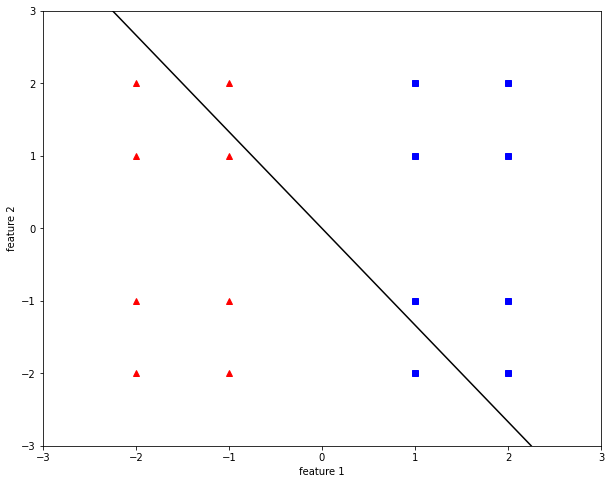

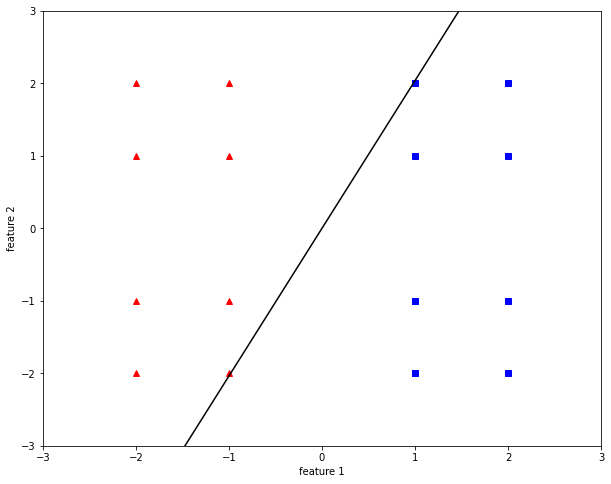

In [5]:
model = Perceptron()
model.set_weight(w.copy())
model.set_data(X.copy(),y.copy())
model.set_hyperparams(1e-3, 100)
miss_nos, _ = model.train()

Text(0.5, 0, 'Epoch')

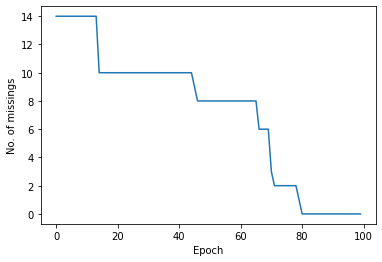

In [6]:
plt.plot(miss_nos)
plt.ylabel('No. of missings')
plt.xlabel('Epoch')